<font size = 8> Moore-Penrose Pseudoinverse

***

## Libraries & Stuff

In [10]:
import numpy as np

In [1]:
import torch

In [ ]:
import tensorflow as tf

In [11]:
import matplotlib.pyplot as plt

.DS_Store files

find .  -name ".DS_Store" -depth -exec rm {} \;

In [1]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

In [2]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

***

In [1]:
# enables us to inverse non-square matrices

In [2]:
# critical to machine learning

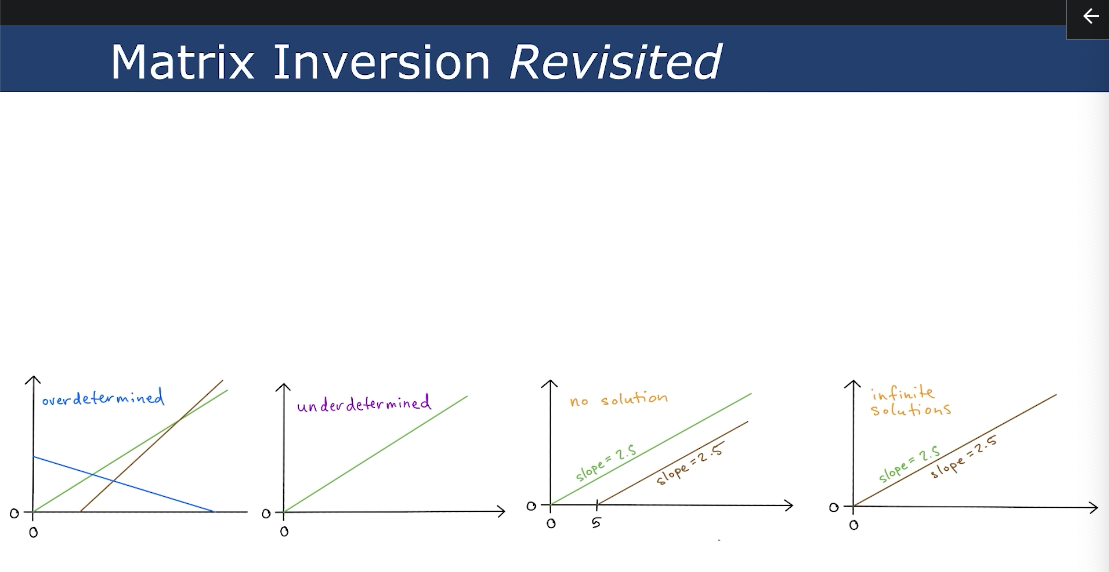

In [3]:
# why some matrices an be inverted

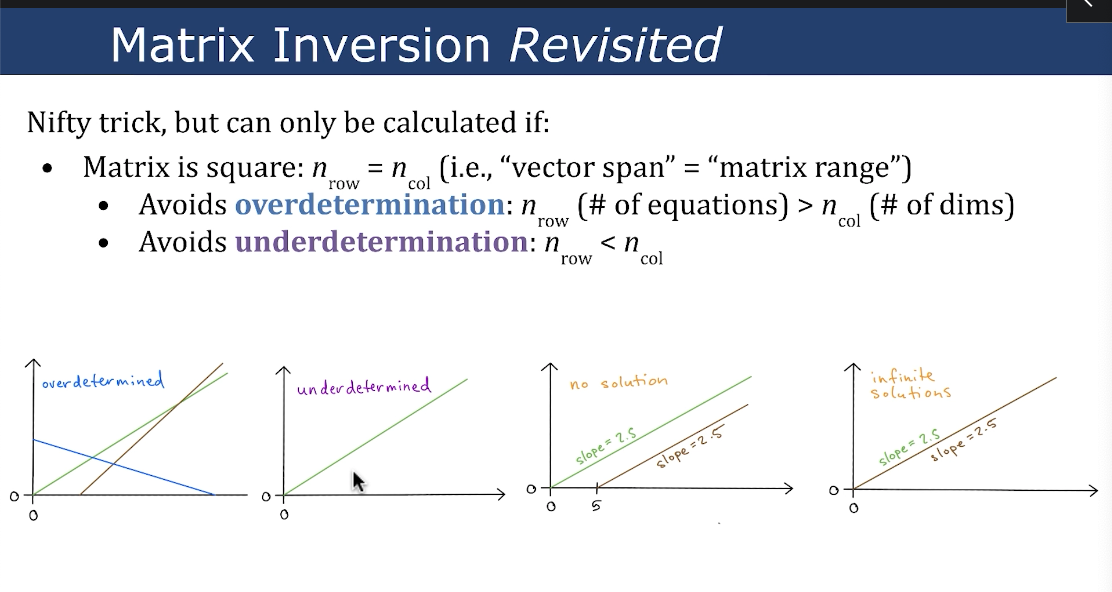

In [4]:
# underdetermined

# 3 rows, 2 columns

In [5]:
# underdetermined

# 1 row, 2 columns

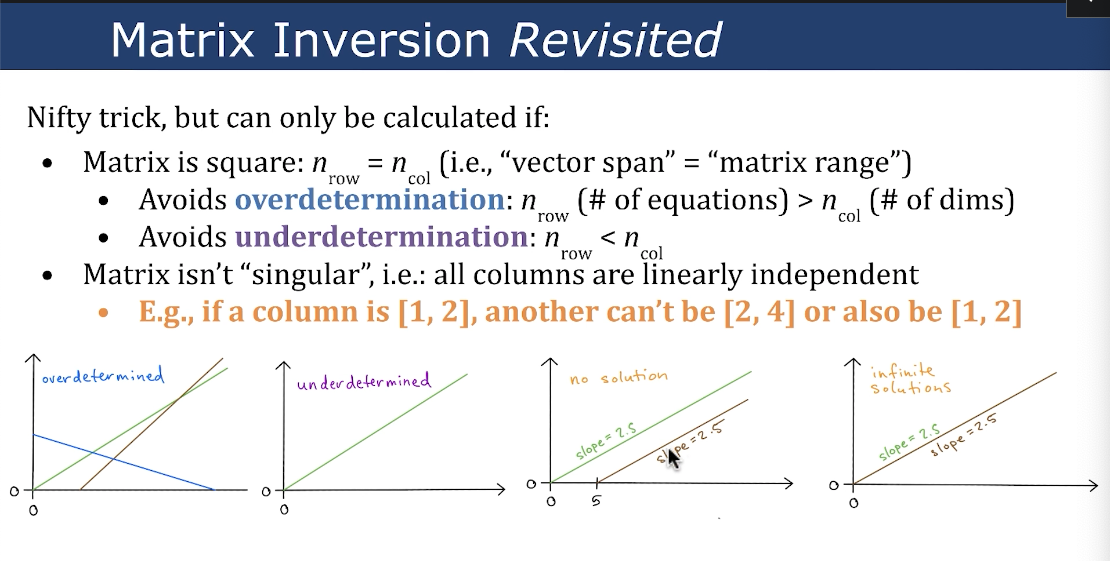

Let's calculate the pseudoinverse $A^+$ of some matrix $A$ using the formula from the slides: 

$A^+ = VD^+U^T$

***

In [12]:
A = np.array([[-1, 2], [3, -2], [5, 7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [13]:
# this is not a square

In [14]:
# not invertible -- but can be pseudoinvertible

In [16]:
# start with SVD equartion

In [15]:
U, d, VT = np.linalg.svd(A)

In [17]:
U

# left singular vectors of A

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [18]:
VT

# Right singular vectors of A

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [20]:
d

# singular values of A

array([8.66918448, 4.10429538])

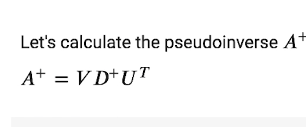

In [21]:
# we will need to transpose U and V

To create $D^+$, we first invert the non-zero values of $d$: 

In [22]:
D = np.diag(d)

In [23]:
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

In [25]:
# manual inversion

1/8.669

0.11535355865728457

In [26]:
# manual inversion

1/4.104

0.24366471734892786

...and then we would take the tranpose of the resulting matrix.

Because $D$ is a diagonal matrix, this can, however, be done in a single step by inverting $D$: 

In [29]:
Dinv = np.linalg.inv(D)

# inverting using the inv method in numpy

In [28]:
Dinv

array([[0.1153511 , 0.        ],
       [0.        , 0.24364718]])

***

$D^+$ must have the same dimensions as $A^T$ in order for $VD^+U^T$ matrix multiplication to be possible: 

In [30]:
# D+ must have the same dimensions (done fro SVD as well)

In [31]:
# concatane 0 values

Dplus = np.concatenate((Dinv, np.array([[0, 0]]).T), axis=1)

# axis = 1 means we are adding columns to the right

In [32]:
Dplus

array([[0.1153511 , 0.        , 0.        ],
       [0.        , 0.24364718, 0.        ]])

(Recall $D$ must have the same dimensions as $A$ for SVD's $UDV^T$, but for MPP $U$ and $V$ have swapped sides around the diagonal matrix.)

Now we have everything we need to calculate $A^+$ with $VD^+U^T$: 

In [34]:
np.dot(VT.T, np.dot(Dplus, U.T))

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

In [35]:
# this is the pseudo inverse of matrix A

Working out this derivation is helpful for understanding how Moore-Penrose pseudoinverses work, but unsurprisingly NumPy is loaded with an existing method `pinv()`: 

In [36]:
np.linalg.pinv(A)

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

***

## Doing same in PyTorch

**Exercise** 

Use the `torch.svd()` method to calculate the pseudoinverse of `A_p`, confirming that your result matches the output of `torch.pinverse(A_p)`: 

In [2]:
A_p = torch.tensor([[-1, 2], [3, -2], [5, 7.]])

In [3]:
A_p

tensor([[-1.,  2.],
        [ 3., -2.],
        [ 5.,  7.]])

In [4]:
torch.pinverse(A_p)

tensor([[-0.0877,  0.1777,  0.0758],
        [ 0.0766, -0.1193,  0.0869]])

In [11]:
U_p, d_p, VT_p = torch.linalg.svd(A_p)

In [12]:
U_p

tensor([[ 0.1271,  0.4741,  0.8713],
        [ 0.0016, -0.8785,  0.4778],
        [ 0.9919, -0.0593, -0.1124]])

In [13]:
d_p

tensor([8.6692, 4.1043])

In [14]:
VT_p

tensor([[ 0.5580,  0.8298],
        [-0.8298,  0.5580]])

In [15]:
D_p = torch.diag(d_p)

In [16]:
D_p

tensor([[8.6692, 0.0000],
        [0.0000, 4.1043]])

In [17]:
Dinv_p = torch.linalg.inv(D_p)

In [18]:
Dinv_p

tensor([[0.1154, -0.0000],
        [0.0000, 0.2436]])

In [21]:
Dplus_p = torch.cat((Dinv_p, torch.tensor([[0, 0]]).T), axis=1)

In [22]:
Dplus_p

tensor([[0.1154, -0.0000, 0.0000],
        [0.0000, 0.2436, 0.0000]])

In [25]:
# finally calculating the pseudoinverse

torch.mm(VT_p.T, torch.mm(Dplus_p, U_p.T))

tensor([[-0.0877,  0.1777,  0.0758],
        [ 0.0766, -0.1193,  0.0869]])

In [26]:
# mm is the equavalent of dot in PyTorch

In [27]:
# compare with inbuilt function

torch.pinverse(A_p)

tensor([[-0.0877,  0.1777,  0.0758],
        [ 0.0766, -0.1193,  0.0869]])